In [183]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import glob
import json
import cv2
from PIL import Image

In [184]:
path = np.load('/data2/datasets/flir_aligned/dataset/validation/RGB/FLIR_08864.npy')
print(path.shape)

(512, 640, 3)


In [185]:
parse_txt = '/data2/datasets/flir_aligned/dataset/align_validation.txt'
parse_list = list()
day_parse_txt = '/data2/datasets/flir_aligned/dataset/align_validation_day.txt'
day_parse_list = list() 
night_parse_txt = '/data2/datasets/flir_aligned/dataset/align_validation_night.txt'
night_parse_list = list() 

for line in open(os.path.join(parse_txt)):
    parse_list.append(line.strip()[5:10])
for line in open(os.path.join(day_parse_txt)):
    day_parse_list.append(line.strip()[5:10])
for line in open(os.path.join(night_parse_txt)):
    night_parse_list.append(line.strip()[5:10])

parse_list.sort()
day_parse_list.sort()
night_parse_list.sort()

correspondence_list = glob.glob('/data2/datasets/flir_aligned/dataset/validation/Coordinates/*.json')
correspondence_list.sort()

In [186]:
x_values = []
y_values = []

for i, cor in enumerate(correspondence_list):
    with open(cor) as j :
        correspondence_info = json.load(j)

    match_points = correspondence_info['match_pts']
    
    for match_pt in match_points:
        x_values.append(match_pt[0][0])
        y_values.append(match_pt[0][1])

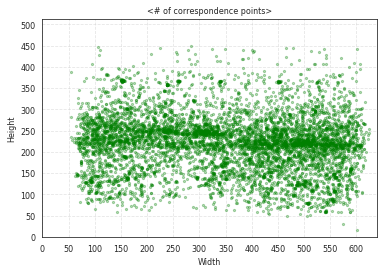

In [202]:
# 1. 단순히 scatter에 점 찍어서 분포 표현하기

X=np.array([0,640])
Y=np.array([0,512])

plt.xlim(0,640)
plt.ylim(0,512)
plt.xticks([0,50,100,150,200,250,300,350,400,450,500,550,600],fontsize=8)
plt.yticks([0,50,100,150,200,250,300,350,400,450,500],fontsize=8)
#plt.plot(X,Y,color='None')
plt.title('<# of correspondence points>',fontsize=8)
plt.xlabel('Width',fontsize=8)
plt.ylabel('Height',fontsize=8)

plt.scatter(x_values,y_values,s=5, c='green',alpha=0.3,edgecolors='face')
plt.grid(True, alpha=0.5, linestyle='--')
# plt.show()
plt.savefig('pixel_correspondence/correspondence_grid_50.png', dpi=600)

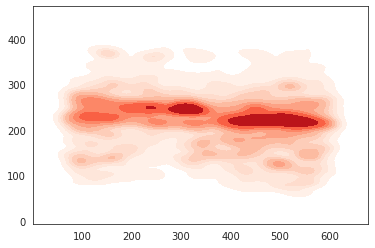

/usr/local/envs/new_pd/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




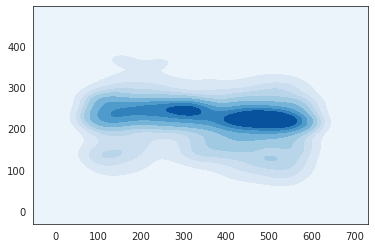

In [204]:
# 밀도 표현하기

import seaborn as sns
import matplotlib.pyplot as plt
 
# set seaborn style
sns.set_style("white")

 
# Custom the color, add shade and bandwidth
sns.kdeplot(x=x_values, y=y_values, cmap="Reds", fill=True, bw_adjust=.5)
plt.show()

# Add thresh parameter
sns.kdeplot(x=x_values, y=y_values, cmap="Blues", shade=True, thresh=0)
plt.show()

/usr/local/envs/new_pd/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



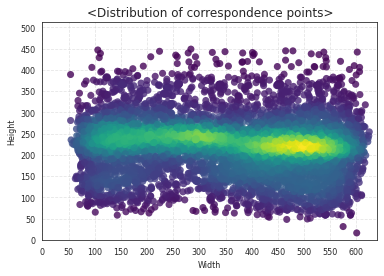

In [240]:
# 3. scatter + 밀도표현 동시에(?)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = x_values
y = y_values

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
img = ax.scatter(x, y, c=z, s=50, edgecolor='',alpha=0.8, cmap = "viridis")
#bar = fig.colorbar(img)
#bar.ax.get_yaxis().set_ticks([])

plt.title('<Distribution of correspondence points>', fontsize=12)
plt.xlabel('Width',fontsize=8)
plt.ylabel('Height',fontsize=8)

plt.xlim(0,640)
plt.ylim(0,512)
plt.xticks([0,50,100,150,200,250,300,350,400,450,500,550,600],fontsize=8)
plt.yticks([0,50,100,150,200,250,300,350,400,450,500],fontsize=8)
plt.grid(True, alpha=0.5, linestyle='--')

plt.savefig('pixel_correspondence/correspondence_density', dpi=600)

In [242]:
print(len(x_values))
print(len(y_values))

7366
7366
